In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [4]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="c:/Users/Lenovo/Desktop/agentic_chatbot/.env")

import os

tavily_api_key = os.getenv("TAVILY_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults(tavily_api_key = tavily_api_key)

In [8]:
tavily.invoke("Provide me the latest AI news")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "ScienceDaily\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Thursday, May 22, 2025\n\n### Wednesday, May 21, 2025\n\n### Monday, May 19, 2025\n\n### Thursday, May 15, 2025\n\n### Wednesday, May 14, 2025\n\n### Tuesday, May 13, 2025\n\n### Monday, May 12, 2025\n\n### Thursday, May 8, 2025\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday, May 1, 2025\n\n### Wednesday, April 30, 2025\n\n### Monday, April 28, 2025 [...] ### Friday, April 25, 2025\n\n### Thursday, April 24, 2025\n\n### Wednesday, April 23, 2025\n\n### Tuesday, April 22, 2025\n\n### Monday, April 21, 2025\n\n### Wednesday, April 16, 2025\n\n### Tuesday, April 15, 2025\n\n### Monday, April 14, 2025\n\n### Thursday, April 10, 2025\n\n### Wednesday, April 9, 202

In [9]:
# combine all these tools in the list

tools = [arxiv, wiki, tavily]

In [10]:
# initialize the LLM model

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-70b-8192", api_key=groq_api_key)

In [11]:
llm.invoke("What is AI?")

AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, identify patterns, and improve their performance over time.\n2. **Reasoning**: AI systems can draw conclusions, make decisions, and solve problems using logic and rules.\n3. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n\nThe primary goal of AI is to create machines that can think, learn, and act like humans, but with the ability to process vast amounts of data much faster and more accurately. AI systems can be categorized into two types:\n\n**Narrow or Weak AI**: Designed to perform a specific task, such as:\n\t* Virtual assistants (e.g., Siri, Alexa)\n\t* Image recognition systems\n\t* Language translation software\n\t* Expert systems (e.g., medical diagnosis)\n\n**General or Strong AI**: Aims to create 

In [12]:
# bind the LLM with tools

llm_with_tools = llm.bind_tools(tools = tools)

In [13]:
llm_with_tools.invoke("what is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qfffa5873', 'function': {'arguments': '{"query":"AI news"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 1165, 'total_tokens': 1209, 'completion_time': 0.17992697, 'prompt_time': 0.044451823, 'queue_time': 0.05828836999999999, 'total_time': 0.224378793}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5a3c24a1-23e1-4ec1-a2af-ac11f88a45e2-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI news'}, 'id': 'qfffa5873', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1165, 'output_tokens': 44, 'total_tokens': 1209})

In [14]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tnc9z2frz', 'function': {'arguments': '{"query":"quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 1166, 'total_tokens': 1211, 'completion_time': 0.197795667, 'prompt_time': 0.037035436, 'queue_time': 0.055552554, 'total_time': 0.234831103}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c5408545-c13c-4cd1-8e23-ffa6a44456d5-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'tnc9z2frz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1166, 'output_tokens': 45, 'total_tokens': 1211})

In [15]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1fwnq1aqf', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 1162, 'total_tokens': 1206, 'completion_time': 0.172304769, 'prompt_time': 0.044309694, 'queue_time': 0.05453235100000001, 'total_time': 0.216614463}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--69c90855-0770-4ba0-8c52-52a9a3dd2ce3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': '1fwnq1aqf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1162, 'output_tokens': 44, 'total_tokens': 1206})

In [ ]:
# Note the 'name' key in all the AIMessage. The LLM will know which tool to call based on the input provided by the user.

### Workflow using LangGraph

In [17]:
from typing_extensions import TypedDict 
from langchain_core.messages import AnyMessage   ## Human Message or AI message
from typing import Annotated   ## labelling
from langgraph.graph.message import add_messages   ## Reducers in langgraph

In [18]:
class State(TypedDict):
    # add_messages will not ovveride coming messages but rather append messaged inside the messages variable
    messages: Annotated[list[AnyMessage], add_messages]

In [19]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

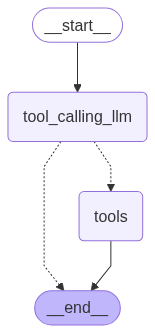

In [20]:
# node definition
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # if the latest message (result) from assistant is not a tool call -> tools_condition routes to END
    tools_condition
)

builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
messages = graph.invoke({"messages": "1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (hnqwhb81h)
 Call ID: hnqwhb81h
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [22]:
messages = graph.invoke({"messages": "Hi, I am Rupesh"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, I am Rupesh
================================== Ai Message ==================================
Tool Calls:
  arxiv (7p58ek2fr)
 Call ID: 7p58ek2fr
  Args:
    query:
================================= Tool Message =================================
Name: arxiv

No good Arxiv Result was found


In [ ]:
# In second case, it didn't go for tool call. It directly went to END node. 

In [23]:
messages = graph.invoke({"messages": "What are the recent AI news and tell me about the latest research in quantum computing."})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What are the recent AI news and tell me about the latest research in quantum computing.
================================== Ai Message ==================================
Tool Calls:
  arxiv (andvwh0ss)
 Call ID: andvwh0ss
  Args:
    query: AI news
================================= Tool Message =================================
Name: arxiv

Published: 2024-08-26
Title: AI Thinking: A framework for rethinking artificial intelligence in practice
Authors: Denis Newman-Griffis
Summary: Artificial intelligence is transforming the way we work with information
across disciplines and practical contexts. A growing range of disciplines are
now involved in studying, developing, and assessing the use of AI in practice,
but these disciplines often employ conflicting understandings of what AI is and
what is involved in its use. New, interdiscipl
